<a href="https://colab.research.google.com/github/arnavvats/fastai_dl_practice/blob/master/lesson_2_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from google image

Lets see how to create a dataset from google images.

In [0]:
from fastai.vision import *
import numpy as np

## Get a list of URLs

### Search and scroll

Set for images on google images and scroll down, the maximum images google shows is 700.

Run the following code in console by opening inspect element.


```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el => JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create a directory and upload urls into server

Choose an appropriate name for your labelled images. You can run these steps multiple times to create different labels.



In [0]:
folder = 'black'
file = 'urls_black.csv'

In [0]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

You will need to run this cell once per each category.

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

In [24]:
path.ls()

[PosixPath('data/bears/urls_teddys'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/urls_grizzly'),
 PosixPath('data/bears/urls_black')]

## Download images

Now download images from respective urls.

Fastai has a function that allows you to just do that. Specify the urls filename and destination folder and the function will download and save all images that can be opened.


In [0]:
classes = ['teddys','grizzly','black']

In [46]:
download_images(path/file, dest, max_pics = 200)

Error https://www.stlzoo.org/files/2315/3721/2590/Grizzly_Bear_Christopher_Carter_25.jpg HTTPSConnectionPool(host='www.stlzoo.org', port=443): Max retries exceeded with url: /files/2315/3721/2590/Grizzly_Bear_Christopher_Carter_25.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f7c6b7dada0>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://www.stlzoo.org/files/8015/0291/8096/HuckandFinley1_Laura_Porter_via_ZooMontana.jpg HTTPSConnectionPool(host='www.stlzoo.org', port=443): Max retries exceeded with url: /files/8015/0291/8096/HuckandFinley1_Laura_Porter_via_ZooMontana.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f7c6b7da550>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [47]:
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

teddys


grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000064.jpeg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000155.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000083.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000113.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000121.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000085.jpg'>
cannot identify image file <_io.BufferedRe

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct = 0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

In [49]:
data.classes

['black', 'grizzly', 'teddys']

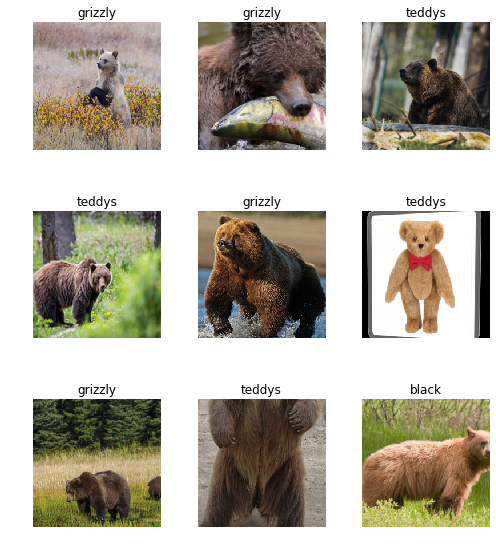

In [50]:
data.show_batch(rows=3, figsize=(7,8))

In [51]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 465, 116)

## Train model

In [52]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 94451639.44it/s]


In [53]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.236991,0.732353,0.439655,03:04
1,1.038029,0.825963,0.405172,03:05
2,0.909470,0.825191,0.422414,03:05
3,0.860571,0.839271,0.448276,03:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


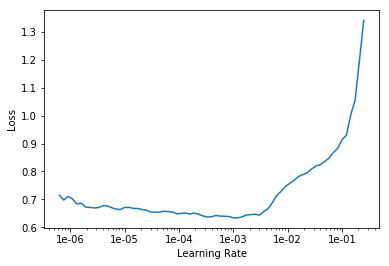

In [57]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.641313,0.931291,0.474138,04:17
1,0.618440,0.958097,0.491379,04:17


In [0]:
learn.save('stage-2')

## Interpretation

In [61]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (465 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (116 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,grizzly,teddys,black,black
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

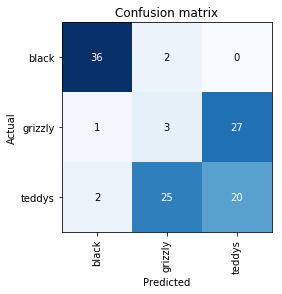

In [63]:
interp.plot_confusion_matrix()

## Cleaning up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the ImageCleaner widget from fastai.widgets we can prune our top losses, removing photos that don't belong.

Notice that the widget will not delete images directly from disk but crreates cleaned.csv file where you can create a new ImageDataBunch with corrected labels to continue training the model.

In order to clean the entire set of images, we need to create a new dataset without the split.

In [64]:
db = (ImageList.from_folder(path)
      .no_split()
      .label_from_folder()
      .transform(get_transforms(), size = 224)
      .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics = error_rate)
learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure this notebook is run in jupyter not jupyterlab because ImageCleaner widget is not available in Jupyterlab.

In [0]:
ImageCleaner(ds, idxs, path)

Flag photos for deletion by clicking 'Delete'.  Click 'Next Batch' to delete flagged photos.

You can also delete duplicates  from the dataset. Run the following code to delete duplicate photos.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path, duplicates = True)